# 张量数值计算

In [1]:
import torch

## 1. 四则运算

## 1.1. 加减乘除

* +、-、*、/：加减乘除
* `add()、sub()、mul()、div()`：加减乘除，不修改原始数据
* `add_()、sub_()、mul_()、div_()`：加减乘除，修改原始数据

In [2]:
tensor1 = torch.randint(low=1, high=9, size=(2, 3))
print(tensor1, tensor1 + 10)
print(tensor1.add(10), tensor1)  # 使用add()方法不修改原始张量
print(tensor1.add_(10), tensor1)  # 使用add_()方法原地操作，修改原始张量

tensor([[1, 5, 3],
        [8, 2, 3]]) tensor([[11, 15, 13],
        [18, 12, 13]])
tensor([[11, 15, 13],
        [18, 12, 13]]) tensor([[1, 5, 3],
        [8, 2, 3]])
tensor([[11, 15, 13],
        [18, 12, 13]]) tensor([[11, 15, 13],
        [18, 12, 13]])


## 1.2. `neg()`、`neg_()`取负

In [3]:
tensor1 = torch.tensor([1, -2, 3])
print(-tensor1)

print(tensor1.neg(), tensor1)
print(tensor1.neg_(), tensor1)

tensor([-1,  2, -3])
tensor([-1,  2, -3]) tensor([ 1, -2,  3])
tensor([-1,  2, -3]) tensor([-1,  2, -3])


## 1.3. `pow()`、`pow_()`求幂

In [4]:
tensor1 = torch.tensor([1, 2, 3])
print(tensor1 ** 3)

print(tensor1.pow(3), tensor1)
print(tensor1.pow_(3), tensor1)

tensor([ 1,  8, 27])
tensor([ 1,  8, 27]) tensor([1, 2, 3])
tensor([ 1,  8, 27]) tensor([ 1,  8, 27])


## 1.4. `sqrt()`、`sqrt_()`求平方根

In [5]:
tensor1 = torch.tensor([1, 4, 9], dtype=torch.float32)
print(tensor1.sqrt(), tensor1)
print(tensor1.sqrt_(), tensor1)

tensor([1., 2., 3.]) tensor([1., 4., 9.])
tensor([1., 2., 3.]) tensor([1., 2., 3.])


## 1.5. `exp()`、`exp_()`求以e为底求幂

In [6]:
tensor1 = torch.tensor([1, 2, 3], dtype=torch.float32)
print(2.71828183 ** tensor1)

print(tensor1.exp(), tensor1)
print(tensor1.exp_(), tensor1)

tensor([ 2.7183,  7.3891, 20.0855])
tensor([ 2.7183,  7.3891, 20.0855]) tensor([1., 2., 3.])
tensor([ 2.7183,  7.3891, 20.0855]) tensor([ 2.7183,  7.3891, 20.0855])


## 1.6. `log()`、`log_()`求以e为底对数

In [7]:
tensor1 = torch.tensor([2.7183, 7.3891, 20.0855], dtype=torch.float32)
print(tensor1.log(), tensor1)
print(tensor1.log_(), tensor1)

tensor([1.0000, 2.0000, 3.0000]) tensor([ 2.7183,  7.3891, 20.0855])
tensor([1.0000, 2.0000, 3.0000]) tensor([1.0000, 2.0000, 3.0000])


# 2. 哈达玛积（元素级乘法）

使用`*`、`mul()`实现**两个形状相同的张量**之间对位相乘

In [8]:
tensor1 = torch.tensor([[1, 2], [3, 4]])
tensor2 = torch.tensor([[5, 6], [7, 8]])
print(tensor1 * tensor2)
print(tensor1.mul(tensor2), tensor1)
print(tensor1.mul_(tensor2), tensor1)

tensor([[ 5, 12],
        [21, 32]])
tensor([[ 5, 12],
        [21, 32]]) tensor([[1, 2],
        [3, 4]])
tensor([[ 5, 12],
        [21, 32]]) tensor([[ 5, 12],
        [21, 32]])


# 3. 矩阵乘法

* `mm()`严格用于二维矩阵相乘
* `@`、`matmul()`支持多维张量，按最后两个维度做矩阵乘法，其他维度相同，或者至少一个张量对应维度为1，广播后进行运算

In [9]:
tensor1 = torch.tensor([[1, 2, 3], [4, 5, 6]])  # 定义 3 * 2 维度矩阵
tensor2 = torch.tensor([[1, 2], [3, 4], [5, 6]])  # 定义 2 * 3维度矩阵
print(tensor1)
print(tensor2)
print(tensor1.mm(tensor2))
print(tensor1 @ tensor2)
print(tensor1.matmul(tensor2))

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[22, 28],
        [49, 64]])
tensor([[22, 28],
        [49, 64]])
tensor([[22, 28],
        [49, 64]])


In [10]:
tensor1 = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[6, 5, 4], [3, 2, 1]]])  # 定义 2 * 2 * 3 维度张量
tensor2 = torch.tensor([[[1, 2], [3, 4], [5, 6]], [[6, 5], [4, 3], [2, 1]]])    # 定义 2 * 3 * 2维度张量
print(tensor1)
print(tensor2)
print(tensor1 @ tensor2)
print(tensor1.matmul(tensor2))

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[6, 5, 4],
         [3, 2, 1]]])
tensor([[[1, 2],
         [3, 4],
         [5, 6]],

        [[6, 5],
         [4, 3],
         [2, 1]]])
tensor([[[22, 28],
         [49, 64]],

        [[64, 49],
         [28, 22]]])
tensor([[[22, 28],
         [49, 64]],

        [[64, 49],
         [28, 22]]])


# 4. 节省内存
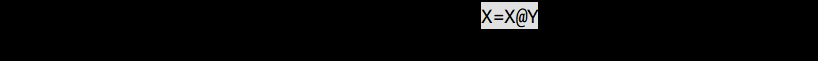

运行一些操作时可能导致为新的结果分配内存，如`X @ Y`，发现`id(X)`会执行另一个位置，因为Python会首先计算X @ Y`，为结果分配新的内存，再令`X`指向内存中的新位置
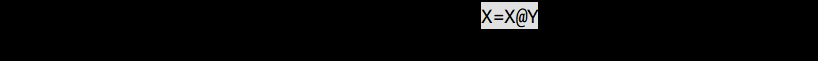
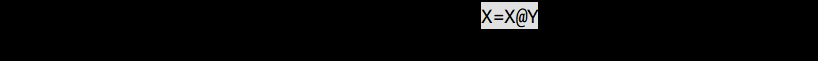
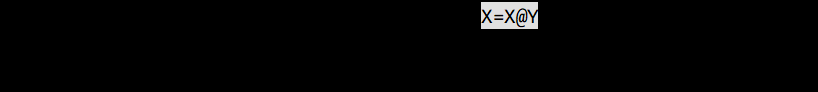

In [11]:
X = torch.randint(1, 9, (3, 2, 4))
Y = torch.randint(1, 9, (3, 4, 1))
print(id(X))
X = X @ Y
print(id(X))

2307032199120
2307032199360


如果后续`X`不再重复使用，可以使用`X[:] = X @ Y`来减少内存开销

In [12]:
X = torch.randint(1, 9, (3, 2, 4))
Y = torch.randint(1, 9, (3, 4, 1))
print(id(X))
X[:] = X @ Y
print(id(X))

2307032196240
2307032196240
